## PML 2022
## Homework 1: Python for basic data analysis


Name: Last, First

Department:




This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset. 

![breast image](breastimg.png)

| *Fig. 1. Cell nuclei in a breast histopathology image* | 
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|


Tasks:

[Task 1](#section1)

[Task 2](#section2)

[Task 3](#section3)

[Task 4](#section4)

[Task 5](#section5)

## Dataset

    - Number of data samples: 569
    
    - Each data sample has 30 numeric features/attributes. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        : 212 Malignant (0)
        : 357 Benign (1)
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
import sklearn.datasets as ds
import numpy as np

In [3]:
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))

print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst

In [4]:
# we are going to use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10]
tgts = breast_ds.target

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)

#print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)


### Task 1: Explore the dataset.  30 points <a id = "section1"/>
    - count the number of data samples for each category. 
    - calculate the the mean feature vectors.
    - plot the mean feature vectors.

In [5]:
# count and print out the number of malignant samples (0)
malignant = (tgts == 0)
malignant_count = malignant.sum()
print('malignant_count:', malignant_count)

# count and print out the number of benign samples (1)
benign = (tgts == 1)
benign_count = benign.sum()
print('benign_count:', benign_count)

malignant_count: 212
benign_count: 357


In [6]:
# mean of all feature vectors
all_mean = np.mean(ftrs, axis=0)
print('all_mean:', all_mean)

# mean of benign feature vectors
benign_ftrs = np.empty(shape=[0,10])
malignant_ftrs = np.empty(shape=[0,10])
print(benign_ftrs.shape)
for i, v in enumerate(ftrs):
    if tgts[i]:
        benign_ftrs = np.vstack((benign_ftrs, v))
    else:
        malignant_ftrs = np.vstack((malignant_ftrs, v))


# mean of benign feature vectors
b_mean = np.mean(benign_ftrs, axis=0)
print('b_mean:', b_mean)

# mean of malignant feature vectors
m_mean = np.mean(malignant_ftrs, axis=0)
print('m_mean:', m_mean)

all_mean: [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02]
(0, 10)
b_mean: [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02]
m_mean: [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02]


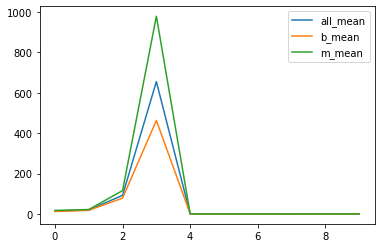

In [11]:
# show the mean feature vectors using matplotlib 
from matplotlib import pyplot as plt

plt.plot(all_mean, label='all_mean')
plt.plot(b_mean, label='b_mean')
plt.plot(m_mean, label='m_mean')
plt.legend(loc='upper right')
plt.show()

### Task 2: Data search. 10 points.  <a id = "section2"/>

Let the user input a sample id (0 to 568), and your code will output the feature vector and the corresponding class label of that sample.

    - Extra 5 points for dealing with abnormal input
    - 5 extra points for enabling multiple searches in one run


In [13]:
# tip: use the input() function
def search_ftrs():
    sample_id = int(input('Enter sample id: '))
    if sample_id < 0 or sample_id > 568:
        return
    print(f'sample_id: {sample_id}')
    if tgts[sample_id]:
        print(f'class_label: benign')
    else:
        print(f'class_label: malignant')
    
    print(f'values:', ftrs[sample_id])
    
search_ftrs()

Enter sample id: 0
sample_id: 0
class_label: malignant
values: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02]


### Task 3.  Study the 'area' feature. 30 points  <a id = "section3"/>

In [5]:
#Task 3.1: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all benign samples.


# plot the area features of all benign samples



In [6]:
#Task 3.2: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all malignant samples.




# plot the area features of all malignant samples





### Task 4: Count the number of malignant samples that have 'area (index 3)' values less than 600. 10 points  <a id = "section4"/>



### Task 5. 20 points <a id = "section5"/>

Define a function that calculates and return the Euclidean distance between any two given data samples
 

In [7]:
def Eclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients
        
        return: d: the distance
    '''
    
     pass # replace 'pass' using your code


# test
print('two malignant samples:', Eclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Eclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Eclidean(b_mean, m_mean)) # betwwen means

IndentationError: unexpected indent (<ipython-input-7-10fa33675903>, line 8)